In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0e18f57d-14b9-4b23-b881-38af0643881e', # Every user has a unique key
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-01-08T13:08:46.591Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 8857}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9922, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [2]:
type(data)

dict

In [3]:
import pandas as pd 

pd.set_option('display.max_columns',None) # to see all columns or to add a scroller

In [4]:
# TO make data look prettier 
df =pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')

C:\Users\Khushii\AppData\Local\Temp\ipykernel_7892\2399883453.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp']= pd.to_datetime('now')


In [13]:
import os

In [30]:
# In this fuction we are adding new to oyr dataframe df and in this funciton that you will find below we will add it to a csv file

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [ ]:

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')


In [28]:
# When we have to save file in csv format use this format
def api_runner():
 global df
 url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
 parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
 }
 headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0e18f57d-14b9-4b23-b881-38af0643881e',
 }
 
 session = Session()
 session.headers.update(headers)

 try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
 except (ConnectionError, Timeout, TooManyRedirects) as e:
 # print(e)

  df =pd.json_normalize(data['data'])
  df['timestamp']= pd.to_datetime('now')
  df
 

 #Adding data in a CSV file
  if not os.path.isfile(r'C:\Users\Khushii\Desktop\data\API.csv'):
    df.to_csv(r'C:\Users\Khushii\Desktop\data\API.csv',header='column_names')
  else: 
    df.to_csv(r'C:\Users\Khushii\Desktop\data\API.csv',mode='a',header=False)

In [70]:
#df77 = pd.read_csv(r'C:\Users\Khushii\Desktop\data\API.csv')
#df77

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Khushii\\Desktop\\data\\API.csv'

In [31]:
from time import time , sleep

for i in range(333):
    api_runner()
    print('Api Runner completed successfully')
    sleep(60) #repeat after 1 minute
exit()

C:\Users\Khushii\AppData\Local\Temp\ipykernel_7892\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Khushii\AppData\Local\Temp\ipykernel_7892\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


Api Runner completed successfully


C:\Users\Khushii\AppData\Local\Temp\ipykernel_7892\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Khushii\AppData\Local\Temp\ipykernel_7892\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


Api Runner completed successfully


C:\Users\Khushii\AppData\Local\Temp\ipykernel_7892\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Khushii\AppData\Local\Temp\ipykernel_7892\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


Api Runner completed successfully


C:\Users\Khushii\AppData\Local\Temp\ipykernel_7892\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Khushii\AppData\Local\Temp\ipykernel_7892\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


Api Runner completed successfully


C:\Users\Khushii\AppData\Local\Temp\ipykernel_7892\3947607026.py:31: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['Timestamp'] = pd.to_datetime('now')
C:\Users\Khushii\AppData\Local\Temp\ipykernel_7892\3947607026.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


Api Runner completed successfully


KeyboardInterrupt: 

In [32]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9922,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.925601e+07,1.925601e+07,NaN,1,NaN,NaN,None,2023-01-08T13:07:00.000Z,16928.880482,7.561763e+09,-39.5329,-0.052183,0.038840,2.181040,-1.901587,-4.097550,-12.829375,3.259827e+11,39.5549,3.555065e+11,None,2023-01-08T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-08 13:08:48.539397,NaT
1,1027,Ethereum,ETH,ethereum,6334,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-01-08T13:07:00.000Z,1262.184440,2.467745e+09,-42.7018,0.008792,-0.126052,5.398146,-1.806456,2.753960,-4.261358,1.544584e+11,18.7450,1.544584e+11,None,2023-01-08T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-08 13:08:48.539397,NaT
2,825,Tether,USDT,tether,45865,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.627249e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-01-08T13:07:00.000Z,1.000001,1.102962e+10,-37.3784,0.000011,0.019386,0.035219,-0.009354,0.111557,-0.008715,6.627253e+10,8.0428,7.314181e+10,None,2023-01-08T13:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-08 13:08:48.539397,NaT
3,3408,USD Coin,USDC,usd-coin,9439,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.389049e+10,4.389049e+10,NaN,4,NaN,NaN,None,2023-01-08T13:07:00.000Z,1.000089,1.355374e+09,-37.7875,0.010748,0.002327,-0.003610,0.008782,-0.000653,0.002693,4.389440e+10,5.3270,4.389440e+10,None,2023-01-08T13:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-08 13:08:48.539397,NaT
4,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.599634e+08,1.599800e+08,NaN,5,NaN,NaN,None,2023-01-08T13:07:00.000Z,261.154208,2.761109e+08,-31.4150,-0.014280,0.332936,6.804689,-10.277108,-13.685481,-5.434642,4.177512e+10,5.0698,5.223084e+10,None,2023-01-08T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-08 13:08:48.539397,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,4943,Dai,DAI,multi-collateral-dai,1774,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,5.782303e+09,5.782303e+09,NaN,11,NaN,NaN,None,2023-01-08T13:53:00.000Z,0.999770,8.540667e+07,-9.1266,-0.007024,-0.010715,-0.014971,0.004691,-0.010100,0.064361,5.780973e+09,0.7011,5.780973e+09,None,2023-01-08T13:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,NaT,2023-01-08 13:55:13.309940
11,2,Litecoin,LTC,litecoin,867,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.0,7.200764e+07,8.400000e+07,NaN,12,NaN,NaN,None,2023-01-08T13:53:00.000Z,75.944538,3.052660e+08,-31.0313,-0.143088,-0.030221,8.882243,-1.288537,33.495614,42.380024,5.468587e+09,0.6632,6.379341e+09,None,2023-01-08T13:53:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-01-08 13:55:13.309940
12,6636,Polkadot,DOT,polkadot-new,453,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1.158987e+09,1.270010e+09,NaN,13,9.048698e+08,4.236519e+09,None,2023-01-08T13:53:00.000Z,4.681910,8.184509e+07,-10.6439,0.237292,0.485595,8.305053,-12.749478,-24.284902,-26.559266,5.426

In [33]:
#One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case


pd.set_option('display.float_format',lambda x: '%.5f' % x )

In [34]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9922,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19256012.00000,19256012.00000,NaN,1,NaN,NaN,None,2023-01-08T13:07:00.000Z,16928.88048,7561763166.21216,-39.53290,-0.05218,0.03884,2.18104,-1.90159,-4.09755,-12.82937,325982725706.67578,39.55490,355506490120.59998,None,2023-01-08T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-08 13:08:48.539397,NaT
1,1027,Ethereum,ETH,ethereum,6334,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-01-08T13:07:00.000Z,1262.18444,2467744863.61426,-42.70180,0.00879,-0.12605,5.39815,-1.80646,2.75396,-4.26136,154458389845.34869,18.74500,154458389845.35001,None,2023-01-08T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-08 13:08:48.539397,NaT
2,825,Tether,USDT,tether,45865,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,66272490385.24891,73141766321.23428,NaN,3,NaN,NaN,None,2023-01-08T13:07:00.000Z,1.00000,11029619040.32397,-37.37840,0.00001,0.01939,0.03522,-0.00935,0.11156,-0.00871,66272531478.54815,8.04280,73141811673.94000,None,2023-01-08T13:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-01-08 13:08:48.539397,NaT
3,3408,USD Coin,USDC,usd-coin,9439,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43890485280.33595,43890485280.33595,NaN,4,NaN,NaN,None,2023-01-08T13:07:00.000Z,1.00009,1355373934.74717,-37.78750,0.01075,0.00233,-0.00361,0.00878,-0.00065,0.00269,43894398240.35136,5.32700,43894398240.35000,None,2023-01-08T13:07:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-01-08 13:08:48.539397,NaT
4,1839,BNB,BNB,bnb,1165,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159963408.79886,159979963.59043,NaN,5,NaN,NaN,None,2023-01-08T13:07:00.000Z,261.15421,276110879.75144,-31.41500,-0.01428,0.33294,6.80469,-10.27711,-13.68548,-5.43464,41775117357.75842,5.06980,52230841629.90000,None,2023-01-08T13:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-01-08 13:08:48.539397,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,4943,Dai,DAI,multi-collateral-dai,1774,2019-11-22T00:00:00.000Z,"[defi, stablecoin, asset-backed-stablecoin, et...",NaN,5782302936.20855,5782302936.20855,NaN,11,NaN,NaN,None,2023-01-08T13:53:00.000Z,0.99977,85406666.30887,-9.12660,-0.00702,-0.01072,-0.01497,0.00469,-0.01010,0.06436,5780973341.03812,0.70110,5780973341.04000,None,2023-01-08T13:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,NaT,2023-01-08 13:55:13.309940
11,2,Litecoin,LTC,litecoin,867,2013-04-28T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange]",84000000.00000,72007641.80455,84000000.00000,NaN,12,NaN,NaN,None,2023-01-08T13:53:00.000Z,75.94454,305265957.07020,-31.03130,-0.14309,-0.03022,8.88224,-1.28854,33.49561,42.38002,5468587061.80463,0.66320,6379341159.91000,None,2023-01-08T13:53:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2023-01-08 13:55:13.309940
12,6636,Polkadot,DOT,polkadot-new,453,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1158986605.66919,1270010275.97437,NaN,13,904869778.00

In [35]:
# Now let's look at the coin trends over time
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.00596,0.02396,2.30920,-1.40895,-3.91515,-12.58374
Ethereum,0.03062,-0.13194,5.59662,-1.07342,3.34295,-3.93361
Tether,-0.00524,0.01261,0.03315,-0.01360,0.08781,-0.01318
USD Coin,-0.00183,-0.00465,-0.00628,-0.00071,-0.03337,-0.00184
BNB,0.28027,0.42750,7.22116,-9.63443,-12.51137,-4.88973
XRP,0.06221,-1.18152,0.35300,-12.81078,-10.33796,-34.67638
Binance USD,0.00715,-0.00301,0.00081,0.02393,-0.02615,0.00549
Cardano,0.16179,5.49688,17.41487,-8.05618,-19.50435,-30.89671
Dogecoin,-0.05233,-0.64102,2.95010,-26.39424,-20.66639,17.56016


In [36]:
df4 =df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h      0.00596
         quote.USD.percent_change_24h     0.02396
         quote.USD.percent_change_7d      2.30920
         quote.USD.percent_change_30d    -1.40895
         quote.USD.percent_change_60d    -3.91515
                                           ...   
TRON     quote.USD.percent_change_24h     1.20469
         quote.USD.percent_change_7d     -4.11180
         quote.USD.percent_change_30d    -4.03790
         quote.USD.percent_change_60d   -11.80714
         quote.USD.percent_change_90d   -17.86957
Length: 90, dtype: float64

In [38]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.00596
        quote.USD.percent_change_24h   0.02396
        quote.USD.percent_change_7d    2.30920
        quote.USD.percent_change_30d  -1.40895
        quote.USD.percent_change_60d  -3.91515
...                                        ...
TRON    quote.USD.percent_change_24h   1.20469
        quote.USD.percent_change_7d   -4.11180
        quote.USD.percent_change_30d  -4.03790
        quote.USD.percent_change_60d -11.80714
        quote.USD.percent_change_90d -17.86957

[90 rows x 1 columns]

In [40]:
index = pd.Index(range(90))
#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.00596
1,Bitcoin,quote.USD.percent_change_24h,0.02396
2,Bitcoin,quote.USD.percent_change_7d,2.30920
3,Bitcoin,quote.USD.percent_change_30d,-1.40895
4,Bitcoin,quote.USD.percent_change_60d,-3.91515
...,...,...,...
85,TRON,quote.USD.percent_change_24h,1.20469
86,TRON,quote.USD.percent_change_7d,-4.11180
87,TRON,quote.USD.percent_change_30d,-4.03790
88,TRON,quote.USD.percent_change_60d,-11.80714


In [41]:
df7 =df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.00596
1,Bitcoin,quote.USD.percent_change_24h,0.02396
2,Bitcoin,quote.USD.percent_change_7d,2.30920
3,Bitcoin,quote.USD.percent_change_30d,-1.40895
4,Bitcoin,quote.USD.percent_change_60d,-3.91515
...,...,...,...
85,TRON,quote.USD.percent_change_24h,1.20469
86,TRON,quote.USD.percent_change_7d,-4.11180
87,TRON,quote.USD.percent_change_30d,-4.03790
88,TRON,quote.USD.percent_change_60d,-11.80714


In [44]:
df7['percent_change'].replace({'quote.USD.percent_change_1h': ' 1h','quote.USD.percent_change_24h':'24h','quote.USD.percent_change_7d':'7d','quote.USD.percent_change_30d':'30d','quote.USD.percent_change_60d':'60d','quote.USD.percent_change_90d':'90d'},inplace=True)

In [42]:
import seaborn as sns 
import matplotlib.pyplot as plt

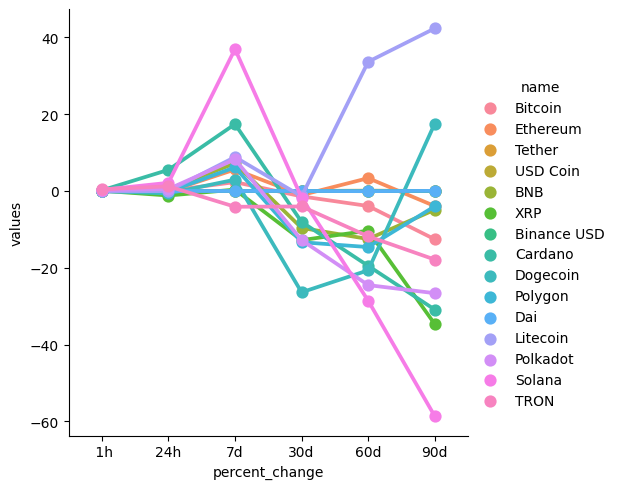

In [45]:
sns.catplot(x='percent_change',y='values',hue='name',data=df7,kind='point')

In [69]:
df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name=='Bitcoin' ")

df10

,name,quote.USD.price,Timestamp
0,Bitcoin,16928.88048,NaT
0,Bitcoin,16938.74446,2023-01-08 13:51:07.640562
0,Bitcoin,16938.49267,2023-01-08 13:52:08.912497
0,Bitcoin,16938.82020,2023-01-08 13:53:10.574511
0,Bitcoin,16936.59131,2023-01-08 13:54:11.880844
0,Bitcoin,16936.39572,2023-01-08 13:55:13.309940


In [64]:
df10.reset_index(inplace=True)

<AxesSubplot: xlabel='Timestamp', ylabel='quote.USD.price'>

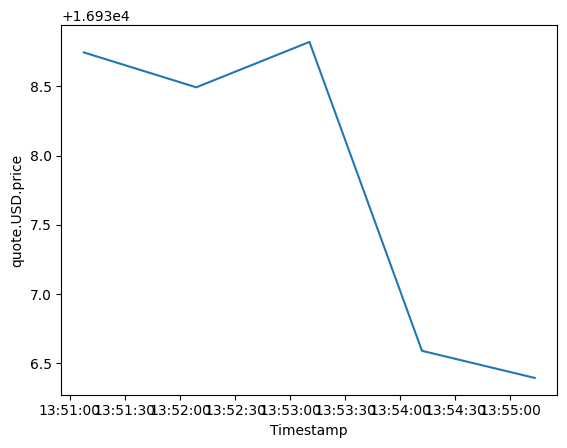

In [65]:
sns.lineplot(x='Timestamp',y='quote.USD.price', data = df10)

In [ ]:
# In the next step I suggest you clean the data and check the relation and get a better insights of this project